# Sentiment Analysis on US Airline Reviews

## Building a text sentiment analysis model,
## train it, evaluate its performance, and make predictions on new data.

### Import necessary libraries for data manipulation, visualization, and building the neural network model.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Embedding

### Load the dataset and prepare it for training by filtering out neutral sentiment.

In [19]:
df = pd.read_csv("./Tweets.csv")
tweet_df = df[['text','airline_sentiment']]
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']

### Encode the sentiment labels into numerical values for model training.

In [20]:
sentiment_label = tweet_df.airline_sentiment.factorize()
tweet = tweet_df.text.values

### Tokenize the text data and pad sequences to a fixed length for input into the neural network.

In [21]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

### Define the architecture of the neural network and compile it.

In [22]:
embedding_vector_length = 32
vocab_size = 5000 

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\amitb\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Build the model by passing dummy input data. This step ensures that the model is properly constructed and ready for summary display, and print the summary of the model to display its architecture and parameters.

In [23]:
dummy_input = np.zeros((1, 200))
model.predict(dummy_input)

# Print the model summary
print(model.summary())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (1, 200, 32)                │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_4                  │ (1, 200, 32)                │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (1, 50)                     │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (1, 50)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 1)                      │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,651 (690.04 KB)

 Trainable params: 176,651 (690.04 KB)

 Non-trainable params: 0 (0.00 B)

None


### Train the neural network model on the training data.

In [24]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=3, batch_size=32)

Epoch 1/3
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.7756 - loss: 0.5276 - val_accuracy: 0.9004 - val_loss: 0.2356
Epoch 2/3
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.8949 - loss: 0.2736 - val_accuracy: 0.9233 - val_loss: 0.1926
Epoch 3/3
289/289 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.9224 - loss: 0.2149 - val_accuracy: 0.9212 - val_loss: 0.1921


### Plot and save the training and validation accuracy and loss over the epochs.

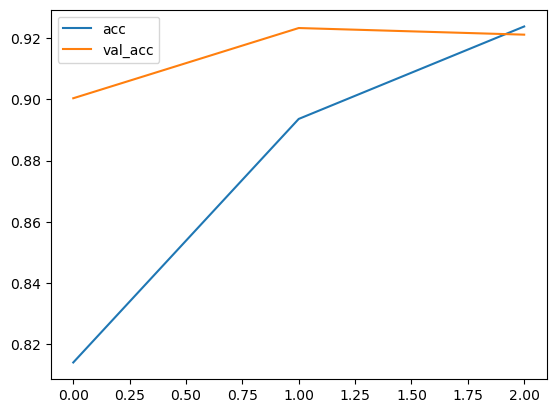

<Figure size 640x480 with 0 Axes>

In [25]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

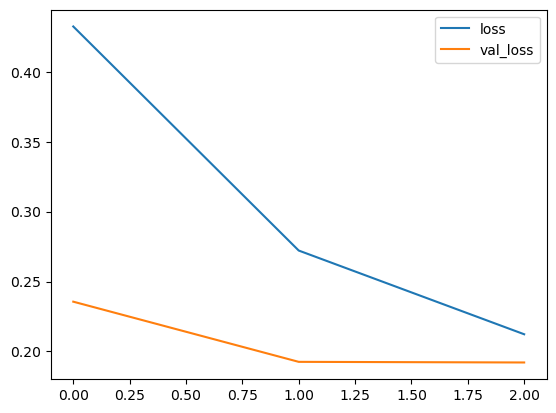

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

### Define a function to predict the sentiment of new sentences and test it with example sentences.

In [27]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [28]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Predicted label:  positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted label:  negative
